# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [123]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
## 동일 경로에 "tran.csv"가 있다면:
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 살아남은 사람들은 어떤 특징을 가지고 있었을까?

In [10]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
## 걱 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [12]:
## 데이터 전체 정보를 얻는 함수: .describe()

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
## 상관계수 확인!

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Correlation is NOT Causation(상관성은 인과성이 아니다)  

상관성: A up, B up, ..  (A가 일어날 때 B도 일어난다)
인관성: A -> B. A로부터 B가 일어난다

In [16]:
## 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견! 언젠가 처리해주자

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

1. Survived Column

In [21]:
## 생존자, 사망자 명수는?

# titatnic_df['Survived'].head()
titatnic_df['Survived'].sum()
# 0이 사망자 1이 생존자니깐 다 더하면 구할 수 있다

342

In [23]:
titatnic_df['Survived'].value_counts()
# 0, 1 이 몇번 나오는지 확인 가능

0    549
1    342
Name: Survived, dtype: int64

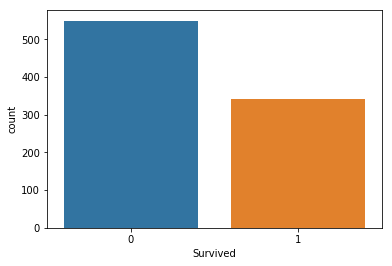

In [26]:
## 생존자수와 사망자수를 BarPlot으로 그려보기 
#sns.countplot() 사용. plt보단 쉽고 깔끔하게 그려준다

sns.countplot(x='Survived', data = titanic_df)
plt.show()

2. Pclass

In [29]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [31]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()
# 1이 생존한 인원

,Survived
Pclass,
1,136
2,87
3,119


In [33]:
# 전체 인원 대비 생존자 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()
# sum을 count로 나눈다는 얘기

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

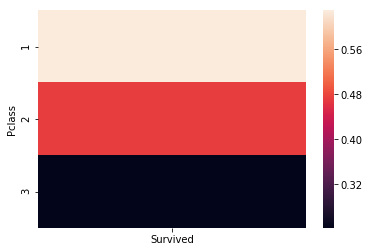

In [35]:
# 히트맵 활용
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

3. SEX

In [36]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


In [37]:
titanic_df.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [38]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

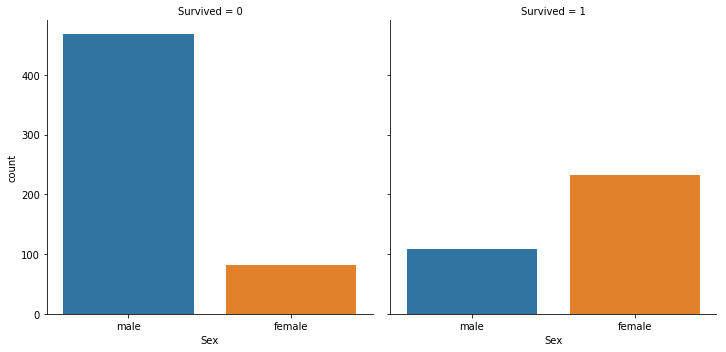

In [40]:
# sns.catplot

sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = titanic_df)
plt.show()

4. Age
나이와 생존자 간의 관계
Remind: 결측치 존재

In [41]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

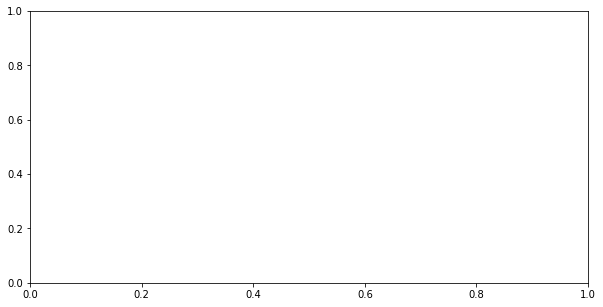

In [50]:
## Survived 1. 0과 Age의 경향성

# figure -> axis -> plot

fig, ax = plt.subplots(1, 1, figsize = (10,5))
# 1? 가로 세로에 몇개 그래프를 그릴건지? 지금은 오직 하나만 그린다고 함

In [48]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.00
2      26.00
3      35.00
8      27.00
9      14.00
10      4.00
11     58.00
15     55.00
17       NaN
19       NaN
21     34.00
22     15.00
23     28.00
25     38.00
28       NaN
31       NaN
32       NaN
36       NaN
39     14.00
43      3.00
44     19.00
47       NaN
52     49.00
53     29.00
55       NaN
56     21.00
58      5.00
61     38.00
65       NaN
66     29.00
       ...  
809    33.00
820    52.00
821    27.00
823    27.00
827     1.00
828      NaN
829    62.00
830    15.00
831     0.83
835    39.00
838    32.00
839      NaN
842    30.00
849      NaN
853    16.00
855    18.00
856    45.00
857    51.00
858    24.00
862    48.00
865    42.00
866    27.00
869     4.00
871    47.00
874    28.00
875    15.00
879    56.00
880    25.00
887    19.00
889    26.00
Name: Age, Length: 342, dtype: float64

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


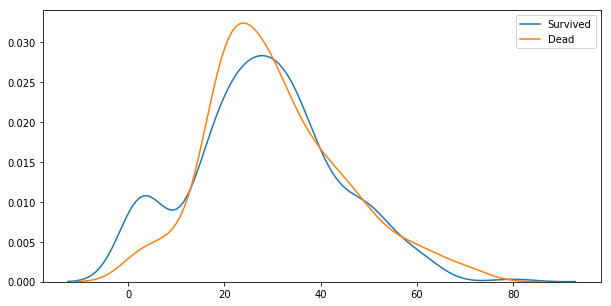

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(titanic_df[titanic_df.Survived == 0]['Age'], ax = ax)

# sns.kdeplot(data = titanic_df[titanic_df['Survived'] == 1]['Age'], ax = ax)
# sns.kdeplot(data = titanic_df[titanic_df.Survived == 0]['Age'], ax = ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### Appendix 1. Sex + Pclass vs Survived

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


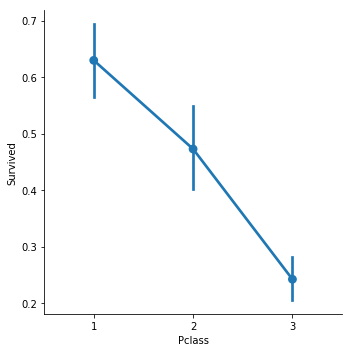

In [67]:
sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = titanic_df)
plt.show()

# 막대기 : 신뢰구간, 꺾은선: 추청치

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


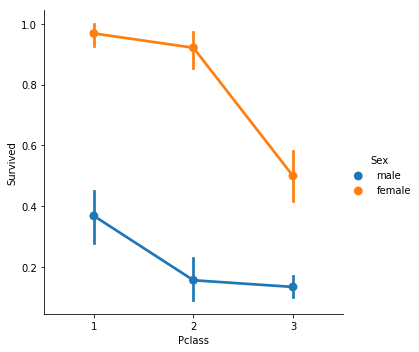

In [68]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', kind = 'point', data = titanic_df)
plt.show()

# hue로 그래프 쪼개보자

### Appendix 2. Age + Pclass

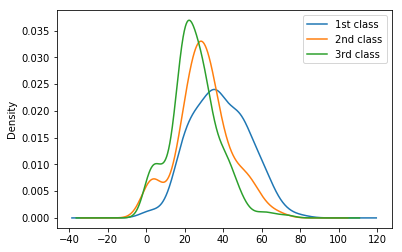

In [73]:
## Age graph with Pclass
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind = 'kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

중심이 오른쪽으로 이동하는 걸 볼 수 있다

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?
- Survived와 관련 있는 Feature를 찾아보자  


In [17]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fare와 Survived의 관계
- Fare가 0 이상 20미만 일때 죽은 사람의 수가 더 많다
- 그 외의 범위일경우(지불한 비용이 20이상일 경우) 살아남은 사람이 더 많다.

In [15]:
# 결측치가 없다
titanic_df[titanic_df['Fare'] == None]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


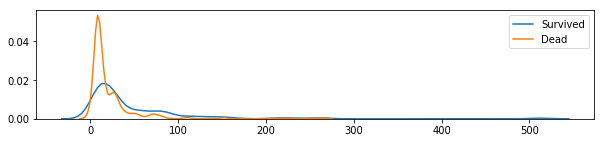

In [8]:
# Fare
fig, ax = plt.subplots(1, 1, figsize = (10,2))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Fare'], ax = ax)
sns.kdeplot(titanic_df[titanic_df.Survived == 0]['Fare'], ax = ax)

plt.legend(['Survived', 'Dead'])

plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


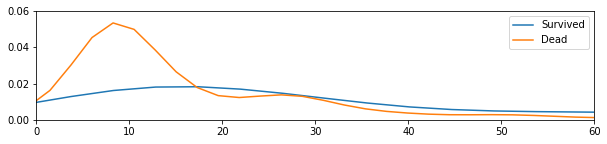

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10,2))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Fare'], ax = ax)
sns.kdeplot(titanic_df[titanic_df.Survived == 0]['Fare'], ax = ax)

plt.axis([0,60,0,0.06])
plt.legend(['Survived', 'Dead'])

plt.show()

### Fare와 SibSp의 관계
- 

In [19]:
# 결측치가 없다
titanic_df[titanic_df['SibSp'] == None]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
# 'SibSp'의 정보
titanic_df['SibSp'].describe()
# 최대값이 8이고 SibSp는 자연수라서, 각각에 대해 그래프를 그릴 예정

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
titanic_df['SibSp'].unique()
# 그래프를 그리기 전 형제 수 집합을 구하기

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


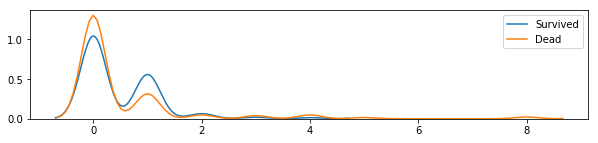

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (10,2))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['SibSp'], ax = ax)
sns.kdeplot(titanic_df[titanic_df.Survived == 0]['SibSp'], ax = ax)

# plt.axis([0,60,0,0.06])
plt.legend(['Survived', 'Dead'])

plt.show()


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [48]:
ramen_df = pd.read_csv("./ramen-ratings.csv")

In [49]:
ramen_df.head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [30]:
ramen_df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

결측치 제거하기

In [72]:
ramen_df['Stars'] = pd.to_numeric(ramen_df['Stars'], errors = 'coerce')
ramen_df = ramen_df[ramen_df['Stars'] != np.isnan(ramen_df['Stars'])]

데이터 형을 str로 바꿔주기

In [200]:
ramen_df['Style'] = ramen_df['Style'].astype(str)
ramen_df['Country'] = ramen_df['Country'].astype(str)

### 1. Country와 Stars의 관계
- 평균 별점이 낮은 곳은 Nigeria
- 의외로 브라질의 평이 좋다

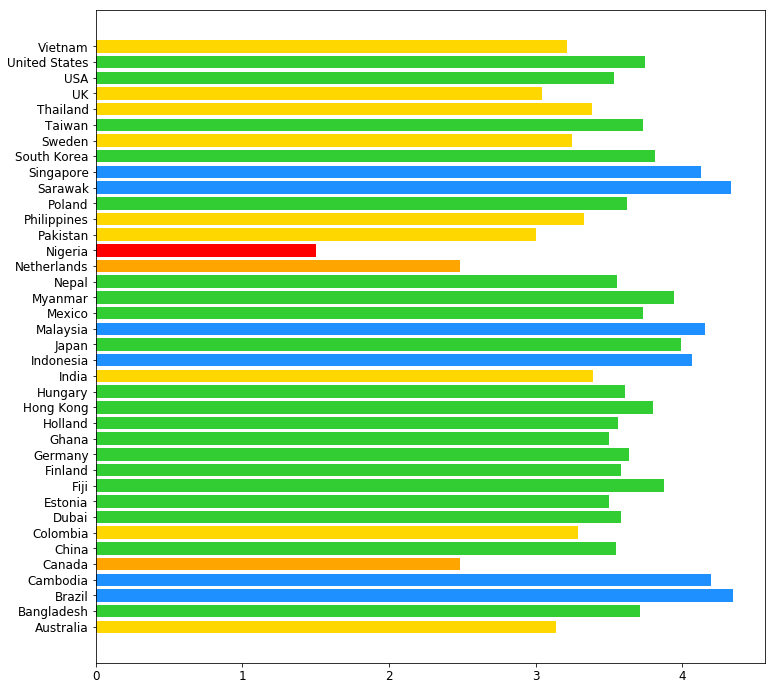

In [310]:
plt.figure(figsize = (12,12))

ramen_country = ramen_df['Country'].unique()
ramen_country.sort()
ramen_coun_star_m = ramen_df.groupby(['Country'])['Stars'].mean()

color_list = []
for country in ramen_country:
    star = ramen_coun_star_m[country]
    if star >= 4:
        color_list.append("dodgerblue")
    elif 4 > star >= 3.5:
        color_list.append("limegreen")
    elif 3.5 > star >= 3:
        color_list.append("gold")
    elif 3 > star >= 2:
        color_list.append("orange")
    elif 2 > star >= 1:
        color_list.append("red")
    else:
        color_list.append("black")
        
plt.rc('font', size=12)
bars = plt.barh(ramen_country, ramen_coun_star_m, color = color_list)
plt.show()

stripplot으로도 확인 가능하다

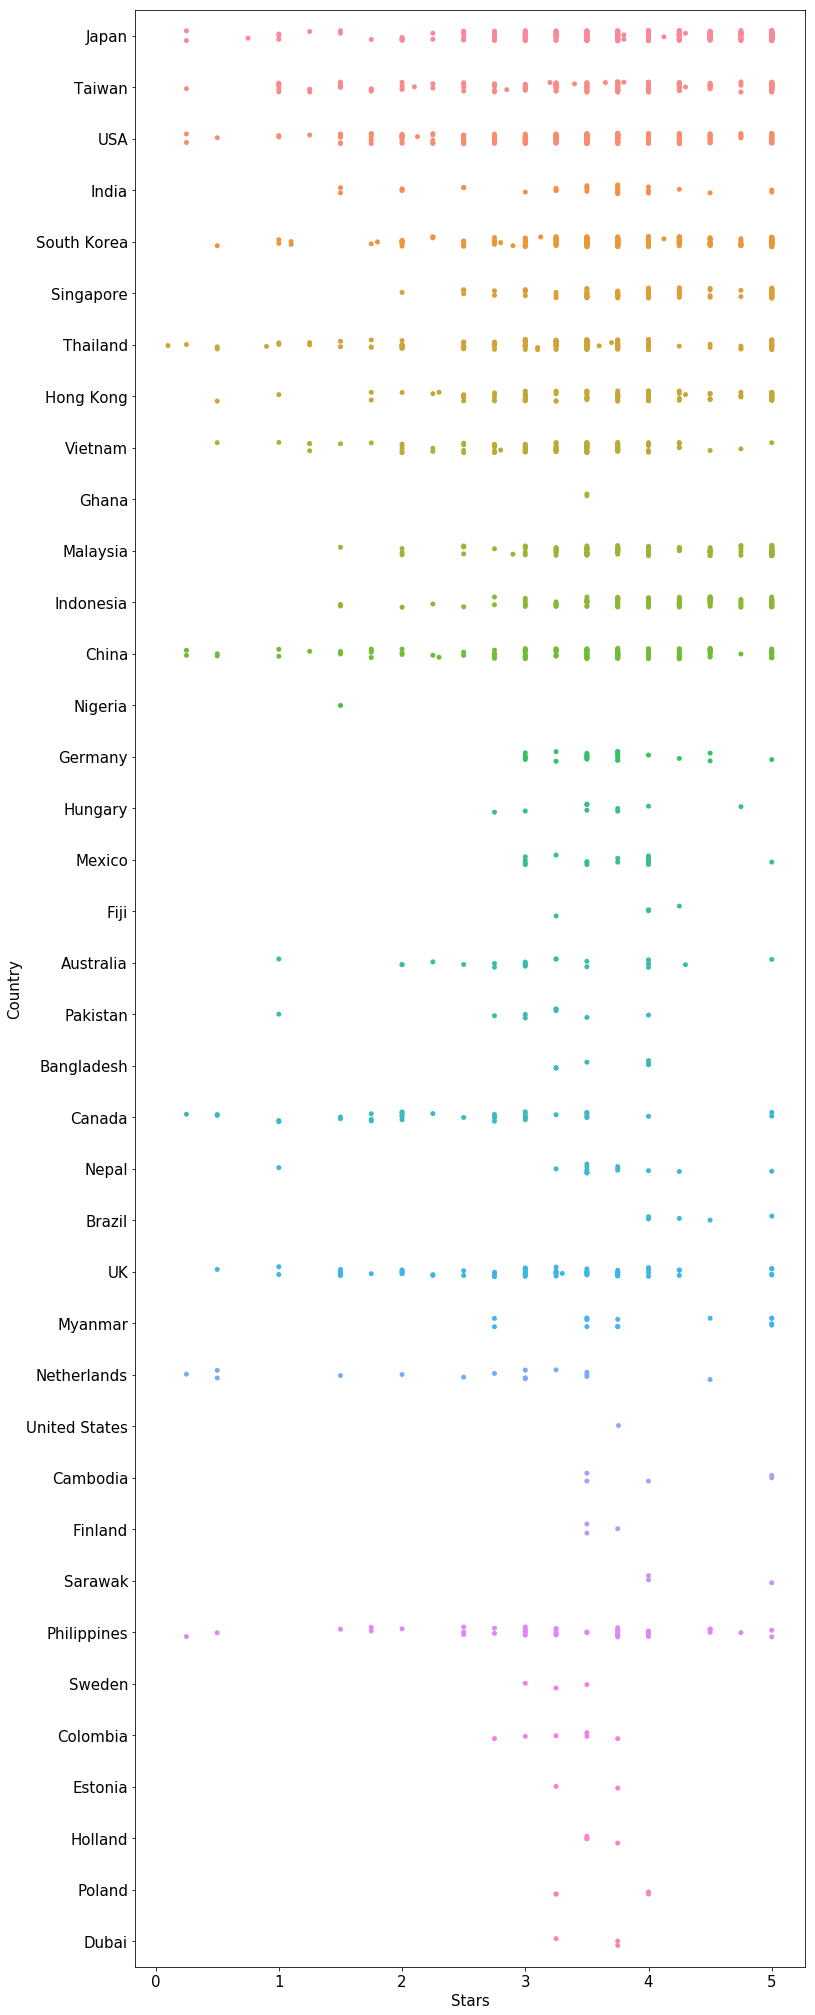

In [278]:
plt.figure(figsize = (12,36))

sns.stripplot(x="Stars", y="Country", data=ramen_df, jitter=True)
plt.show()

### 2. Style과 Stars의 관계
- 형태가 컵라면일 수록 별점이 높다
- Pack, Box, Can, Bar 형태는 편차가 크다

In [128]:
ramen_df['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', 'nan'],
      dtype=object)

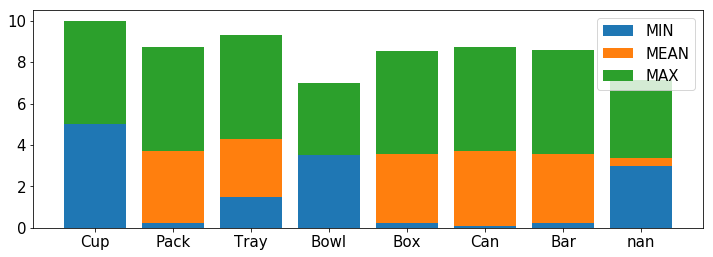

In [280]:
plt.figure(figsize = (12,4))

p1 = plt.bar(ramen_df['Style'].unique(),ramen_df.groupby(['Style'])['Stars'].min())
p2 = plt.bar(ramen_df['Style'].unique(),ramen_df.groupby(['Style'])['Stars'].mean(), bottom = ramen_df.groupby(['Style'])['Stars'].min())
p3 = plt.bar(ramen_df['Style'].unique(),ramen_df.groupby(['Style'])['Stars'].max(), bottom = ramen_df.groupby(['Style'])['Stars'].mean())
plt.legend((p1[0], p2[0], p3[0]), ('MIN', 'MEAN', 'MAX'))
plt.show()

In [165]:
# 충분한 데이터가 없어서 표시가 안됨
# ramen_style = ramen_df['Style'].unique()
# box_list = []
# for style in ramen_style:
#     box_list.append(ramen_df[ramen_df['Style'] == style]['Stars'])

# plt.boxplot(box_list)

### 3. Style과 Country 사이 관계

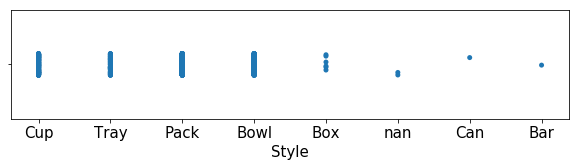

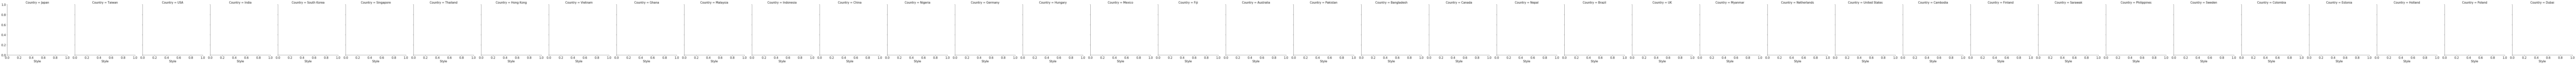

In [306]:
fig, ax = plt.subplots(1, 1, figsize = (10,2))
sns.catplot(x = 'Style', col = 'Country', data = ramen_df, ax = ax)
plt.show()